# Assignment 3
# Question 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
# import dataset

filename = 'C:/Users/Asus/Downloads/Caravan.csv'
data = pd.read_csv(filename)
Y2 = data.Purchase
X2 = data.drop(['Purchase'], axis=1)
display(X2)
display(Y2)

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,0,1,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,0,1,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5818,36,1,1,2,8,0,6,1,2,...,2,0,0,0,1,0,0,0,0,0
5818,5819,35,1,4,4,8,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
5819,5820,33,1,3,4,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
5820,5821,34,1,3,2,8,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0


0        No
1        No
2        No
3        No
4        No
       ... 
5817     No
5818     No
5819    Yes
5820     No
5821     No
Name: Purchase, Length: 5822, dtype: object

In [5]:
# splitting the dataset 

X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [6]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
# train the model (logistic regression)
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(solver = 'liblinear', class_weight='balanced').fit(X_train, y_train)


# predict the results of the model
y_pred = log_reg_model.predict(X_test)

In [9]:
# one hot encode y_test
y_test_roc = y_test.apply(lambda x : 1 if x == 'Yes' else 0)
print(y_test_roc)

840     0
3338    0
2976    0
5114    0
527     0
       ..
491     0
192     0
5580    0
4407    0
3696    0
Name: Purchase, Length: 1165, dtype: int64


In [11]:
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

y_prob_pred = (log_reg_model.predict_proba(X_test))[::,1]
false_pr, true_pr, threshold = metrics.roc_curve(y_test_roc,  y_prob_pred)
print(false_pr,true_pr,threshold)
auc = metrics.roc_auc_score(y_test, y_prob_pred)
print(auc)

[0.00000000e+00 9.19117647e-04 1.83823529e-03 1.83823529e-03
 5.51470588e-03 5.51470588e-03 6.43382353e-03 6.43382353e-03
 9.19117647e-03 9.19117647e-03 1.01102941e-02 1.01102941e-02
 1.10294118e-02 1.10294118e-02 1.47058824e-02 1.47058824e-02
 2.20588235e-02 2.20588235e-02 2.75735294e-02 2.75735294e-02
 2.84926471e-02 2.84926471e-02 2.94117647e-02 2.94117647e-02
 3.03308824e-02 3.03308824e-02 3.49264706e-02 3.49264706e-02
 3.86029412e-02 3.86029412e-02 4.41176471e-02 4.41176471e-02
 5.05514706e-02 5.05514706e-02 5.42279412e-02 5.42279412e-02
 5.69852941e-02 5.69852941e-02 5.97426471e-02 5.97426471e-02
 6.15808824e-02 6.15808824e-02 6.52573529e-02 6.52573529e-02
 7.62867647e-02 7.62867647e-02 7.99632353e-02 7.99632353e-02
 8.27205882e-02 8.27205882e-02 8.36397059e-02 8.36397059e-02
 8.82352941e-02 8.82352941e-02 9.00735294e-02 9.00735294e-02
 9.92647059e-02 9.92647059e-02 1.11213235e-01 1.11213235e-01
 1.22242647e-01 1.22242647e-01 1.25919118e-01 1.25919118e-01
 1.48897059e-01 1.488970

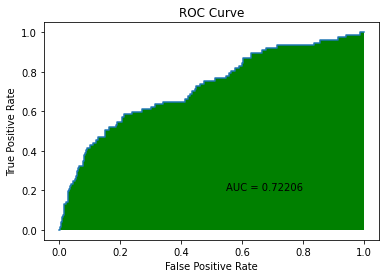

In [13]:
import matplotlib.pyplot as plt  

plt.plot(false_pr,true_pr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.fill_between(false_pr,true_pr, facecolor='green')
plt.text(0.8, 0.2, 'AUC = %0.5f' % auc, ha='right')

plt.show()

# Question 2

In [27]:
# read the dataset
dataset = pd.read_csv('C:/Users/Asus/Downloads/cereal.csv', sep=';', skiprows=[1])

# set the X and y values
X = dataset.drop('name', axis=1)
X = X.drop('rating', axis=1)
y = dataset.iloc[:, -1].values


# one-hot encode the dataset for dataset['type'] and dataset['mfr']

# explore mfr column
print("Exploring mfr column\n", X['mfr'].value_counts())

# explore the type column
print("\nExploring type column\n", X['type'].value_counts())

Encoder = LabelEncoder()

for column in X:
    X[column] = Encoder.fit_transform(X[column])
    X[column].unique()

# display encoded dataset:
display(X)



Exploring mfr column
 K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

Exploring type column
 C    74
H     3
Name: type, dtype: int64


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,3,0,1,3,1,9,11,1,7,33,1,2,2,1
1,5,0,6,2,4,1,3,3,9,24,0,2,2,7
2,2,0,1,3,1,23,10,2,6,34,1,2,2,1
3,2,0,0,3,0,11,12,3,1,35,1,2,2,2
4,6,0,5,1,2,17,1,12,9,0,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,5,1,1,22,0,19,4,10,1,2,2,4
73,1,0,5,0,1,11,0,10,13,3,1,1,2,7
74,6,0,4,2,1,20,6,15,4,20,1,0,2,3
75,1,0,4,2,1,17,6,15,4,19,1,0,2,7


In [52]:
# get train and test set with 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_test_cp = X_test
X_train_cp = X_train 
y_train_cp = y_train
y_test_cp = y_test

# train the model
rating_predictor1 = LinearRegression()
rating_predictor1.fit(X_train, y_train)

# predict on test data
y_pred = rating_predictor1.predict(X_test)
model_coef = rating_predictor1.coef_ 
model_rsq_full = r2_score(y_test, y_pred)
# display the coefficients
print("Model with Sodium and Sugars (Full Model)")
print("coefficients:", model_coef)
print("\nr-squared:", model_rsq_full)



temp = y_test - y_pred
error = sum(temp**2)
k=14+1
N=len(y_test)

AIC_Full = N * np.log(error/N) + 2*k
print("AIC:", AIC_Full)


BIC_Full = N * np.log(error/N) + k*np.log(N)
print('\nBIC:', BIC_Full)

Model with Sodium and Sugars (Full Model)
coefficients: [-0.07511833 -3.69243675 -2.93617256  3.70797205 -1.8372835  -0.4533807
  1.87055594  0.8641529  -0.57773473 -0.22979635 -4.30391171  0.73034643
 -0.06953334 -0.18416742]

r-squared: 0.8854181665863893
AIC: 83.32576078037098

BIC: 94.9145916139677


In [29]:
# removing sodium and sugars
X1 = X.drop('sodium', axis=1)
X1 = X1.drop('sugars', axis=1)
display(X1)

,mfr,type,calories,protein,fat,fiber,carbo,potass,vitamins,shelf,weight,cups
0,3,0,1,3,1,11,1,33,1,2,2,1
1,5,0,6,2,4,3,3,24,0,2,2,7
2,2,0,1,3,1,10,2,34,1,2,2,1
3,2,0,0,3,0,12,3,35,1,2,2,2
4,6,0,5,1,2,1,12,0,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,5,1,1,0,19,10,1,2,2,4
73,1,0,5,0,1,0,10,3,1,1,2,7
74,6,0,4,2,1,6,15,20,1,0,2,3
75,1,0,4,2,1,6,15,19,1,0,2,7


In [30]:
# get train and test set with 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

# train the model
rating_predictor2 = LinearRegression()
rating_predictor2.fit(X_train, y_train)

# predict on test data
y_pred = rating_predictor2.predict(X_test)
model_coef = rating_predictor2.coef_ 
model_rsq_partial = r2_score(y_test, y_pred)
# display the coefficients
print("Model without sodium and sugars")
print("coefficients:", model_coef)
print("\nr-squared:", model_rsq_partial)



temp = y_test - y_pred
error = sum(temp**2)
k=12+1
N=len(y_test)

AIC_partial = N * np.log(error/N) + 2*k
print("AIC:", AIC_partial)


BIC_partial = N * np.log(error/N) + k*np.log(N)
print('\nBIC:', BIC_partial)

Model without sodium and sugars
coefficients: [-0.01018293  1.23308232 -2.9170618   4.23746979 -2.15370354  2.26965912
  0.99513323 -0.23816037 -8.94120614  1.66199666 -1.76780667 -0.08004419]

r-squared: 0.8035678074520515
AIC: 87.95020919071484

BIC: 97.99386257983198


In [31]:
# comparing the values:
print("AIC:\n", AIC_Full, "\t", AIC_partial)
print("BIC:\n", BIC_Full, "\t", BIC_partial)
print("RSQ Error:\n", model_rsq_full, "\t",  model_rsq_partial)

AIC:
 83.32576078037098 	 87.95020919071484
BIC:
 94.9145916139677 	 97.99386257983198
RSQ Error:
 0.8854181665863893 	 0.8035678074520515


### By inference from above result, it can be seen that the model with two less variables is better.

# Question 3

In [36]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train)
lasso_pred = model_lasso.predict(X_test)
print(lasso_pred)

[30.31189179 54.60617181 41.00040291 54.76190135 39.90088916 50.598993
 53.29703489 49.62346776 33.72358092 38.43405266 41.68426868 48.37104248
 71.74715486 30.49987794 46.17756247 36.08749604]


In [37]:
from sklearn.linear_model import Ridge


model_ridge = Ridge(alpha=101)
model_ridge.fit(X_train, y_train)
ridge_pred = model_ridge.predict(X_test)

print(ridge_pred)

[32.18601299 54.43164839 40.22714927 48.95208885 41.17076714 49.89932958
 52.09084478 50.56240832 40.18547578 38.15656233 44.57679764 47.3217423
 66.11410129 31.14223216 41.94896447 34.64262118]


In [38]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet(alpha=1.01)
enet_model.fit(X_train, y_train)
enet_pred = enet_model.predict(X_test)
print(enet_pred)

[31.09306111 54.9976013  40.1050684  52.31767861 41.08658086 51.11701259
 53.53922803 51.29102401 37.64129387 38.37707406 43.38914182 47.69720746
 69.96536451 30.4068779  43.11277122 34.10877779]


In [44]:
from sklearn.metrics import r2_score
def r_squared(predictions, y):
    r_squared = r2_score(y, predictions)
    return r_squared

alphas = [0,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
# alpha_ridge = np.logspace(1e-3, 1000, 12)
rsquare = []
for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train, y_train)
    pred_y = ridge_model.predict(X_test)
    rsquare.append(r2_score(y_test, pred_y))
    # rsquare.append(r_squared(pred_y, y_test))
print(rsquare)

[0.8035678074520531, 0.8040164220233029, 0.8044002731045369, 0.80525737773189, 0.8060259737653324, 0.8061874386871131, 0.8023771700184537, 0.7925885631193088, 0.7728265637170536, 0.7209516499990378, 0.6467515578051619, 0.5280232505657125, 0.3197403615765996, 0.170157693209671]


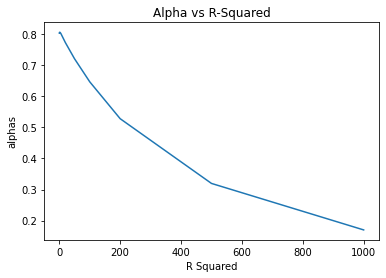

In [45]:
import matplotlib.pyplot as plt  

plt.plot(alphas,rsquare)
plt.ylabel('alphas')
plt.xlabel('R Squared')
plt.title("Alpha vs R-Squared")
plt.show()

In [54]:
from mlxtend.evaluate import bias_variance_decomp
def calc_bias(model):
    mse, bias, var = bias_variance_decomp(model, X_train_cp.values, y_train_cp, X_test_cp.values, y_test_cp, loss='mse')
    return (bias, var)

print(f'Original model bias and var: {calc_bias(rating_predictor1)}')
print(f'Lasso bias and var: {calc_bias(model_lasso)}')
print(f'Ridge bias and var: {calc_bias(model_ridge)}')
print(f'Elastic net bias and var: {calc_bias(enet_model)}')

Original model bias and var: (26.0346752030068, 4.0050672865232215)
Lasso bias and var: (27.801185515496318, 2.1996604459633122)
Ridge bias and var: (40.05119747554378, 2.4985584244811037)
Elastic net bias and var: (32.61879162614994, 2.18893299239617)
